# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [1]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.

#### Solution to ex.5.0.1: Three different real networks

1. Network: Citation Network, Node: Papers/articles, Links: Citations

2. Network: Social Network, Node: Individuals, Links: Frienships

3. Banking network, Node: Banks/Financial institutions, Links: Transactions/capital flows

> **Ex. 5.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

##### Solution 5.0.2: Network of personal interest

A network of personal interest is the international banking network

- The nodes are the banks and financial institutions. As stated above, the links are the transactions/capital flows

- The depends on the definition on financial institutions and the focus. From the link below under "cross-border-banking" a dataset includes 5,498 banks in 139 countries. 

- Yes, several papers in link below tries to quantify/map the network.

- The network is of personal interest as it is highly relevant in terms of quantifying financial systemic risk. The understading of the interinkages in the global financial system can adress how shocks in one banking system transmit to other banking systems. This can help policy makers in formulating macroprudential regulation in the field of systematic financial risk.

Link: https://bankinglibrary.com/research/international-banking-networks/ 

> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

##### Solution 5.0.3: 

In the aftermatch of the covid-19 virus and given the failing of containing it, then I believe social networks will become even more relevant for predicting epidemic spreading.

> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

##### Solution 5.0.4:

Chapter 2.5 states that in real networks, then L (links) is much smaller than L_max (maximum possible number of links defined as N(N-1)/2 ) - this indicates that the most of real networks are sparse (L << L_max).

Examples of of higher link density networks are:

- Epidemic spreading
- The neural network of the brain
- Telecommunication networks

I believe these networks are still sparse given that the number of links are still not close to the maximal number of nodes as these would be enormous.

Link: http://www.network-science.org/highly-connected-society-dense-social-complex-networks.html

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

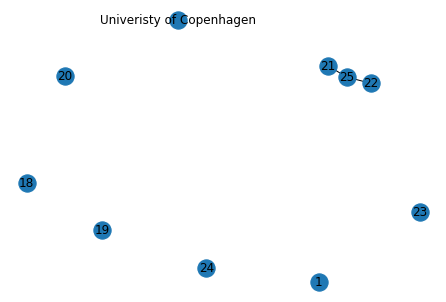

In [21]:
# Example of the use of networkX:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph()

# adding nodes
G.add_node(1)
G.add_node('Univeristy of Copenhagen')
G.add_nodes_from(range(15,25))

# delete nodes
G.remove_node(15)
G.remove_nodes_from([16,17])

# adding and removing edges
G.add_edge(24,25)
e1 = (21,25)
e2 = (22,25)
e = [e1, e2]
G.add_edges_from(e)
G.remove_edge(24, 25)

# plot network
nx.draw(G, with_labels=True)
plt.draw()
plt.show()


> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

The ER network:

The ER graph is a type of random graph. It is also called the Erdoos-Renyi random graph model. In the G(n,p) model, we construct the graph by connecting nodes (fixed number) randomly. Each edge is included in the graph with probability p (fixed). 
This corresponds to a graph G(n,p) having on average (n;2)*p edges. Further, the distribution of the degree of a given node is binomial, such that P(deg(v)=k) = (n-1;k) * p**k * (1-p)**(n-1-k)

C:\Users\Christian\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


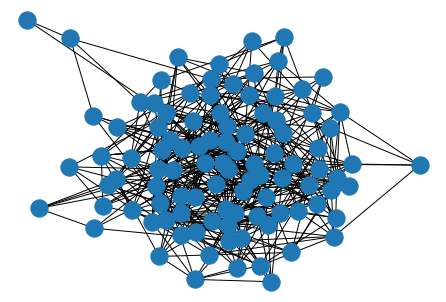

In [122]:
from networkx import erdos_renyi_graph
er = erdos_renyi_graph(n=100, p=0.1, seed=10, directed=False)
nx.draw(er, with_labels=False)
plt.draw()
plt.show()

In [120]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

def degree_plot(network, name=None, show=False):
    degree_sequence = sorted([d for n, d in network.degree()], reverse=False)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = {k: d for k, d in sorted(collections.Counter(degree_sequence).items(),\
                                       key=lambda item: item[0])}
    deg, cnt = zip(*degreeCount.items())
    # Plot
    if show==True:
        fig, ax = plt.subplots()
        plt.bar(deg, cnt, width=0.9, color='r')
        plt.title("%s Degree Histogram" %(name))
        plt.ylabel("Count")
        plt.xlabel("Degree")
        ax.set_xticklabels(deg)
        ax.set_xticks([d - 0 for d in deg])
        plt.show()

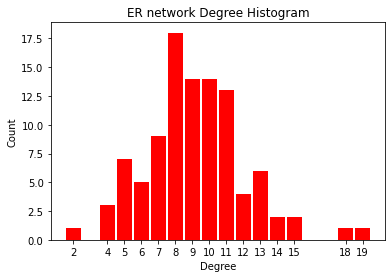

In [124]:
degree_plot(network=er, name='ER network', show=True)

> **Ex. 5.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

The BA network here is also considered a random network.
The network is scale-free networks meaning that it has a power-law degree distributions. 

It is constructed such that it contains few nodes (hubs) with very high degree density relative to other nodes in the network. 
The BA model tries to explain the existence of such nodes in real networks.

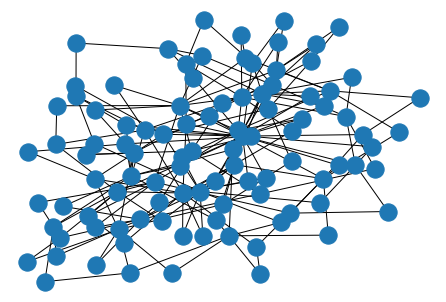

In [95]:
from networkx import barabasi_albert_graph
ba = barabasi_albert_graph(n=100, m=2, seed=10)
nx.draw(ba, with_labels=False)
plt.draw()
plt.show()

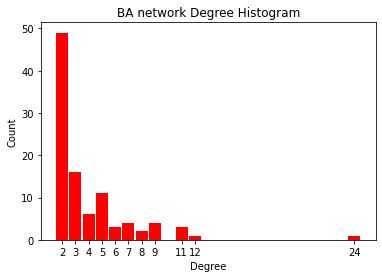

In [125]:
degree_plot(network=ba, name='BA network', show=True)

In [ ]:
# 5. The degree distribution of the BA graph is much more heavy-tailed. 
# 6. One could compare 'Mean degree' and 'The average clustering coefficient'

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [1]:
import pandas as pd
import gzip

f = gzip.open('facebook-wall.txt.gz') 

data = pd.read_csv(
    f,
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)
f.close()

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [3]:
import networkx as nx
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [4]:
import networkx as nx

def time_slice(t0, t1, data):
    #t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
    #t1 = data.timestamp.max()              # Upper bound of time-slice

    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    
    return G_t



> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

In [5]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

def degree_distribution(degrees):
    degrees = sorted([d for n, d in degrees]) # degree sequence
    counts = collections.Counter(degrees)
    degrees, counts = zip(*counts.items())
    return degrees, counts

# Defining time stamps
t0 = data.timestamp.max() - 86400 * 365
t1 = data.timestamp.max()            

# Create the `nx.DiGraph`
G_t = time_slice(t0, t1, data)


degin, cntin = degree_distribution(G_t.in_degree())
degout, cntout = degree_distribution(G_t.out_degree())
plt.plot(degin, cntin, 'o', label = 'In-degree')
plt.plot(degout, cntout, 'o', label = 'Out-degree')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(frameon=True, fontsize=10)

# Having a look at nodes and edges
print("Nodes: %d & Edges: %d" %(len(G_t.nodes), len(G_t.edges)))  

# The in-degree and out-degree plots are similar to the BA network due to the heavy tails.

Nodes: 44397 & Edges: 201632


> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

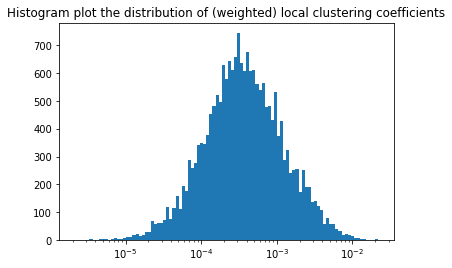

In [20]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G = list(nx.clustering(G_t, weight ='weight').values())
G = list(filter(lambda num: num != 0, G))
low = min(G)
high = max(G)

# Histogram
plt.hist(G, bins=np.logspace(np.log10(low),np.log10(high), 100))
plt.title("Histogram plot the distribution of (weighted) local clustering coefficients")
plt.gca().set_xscale("log")
plt.show()

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [21]:
import networkx as nx
import netwulf as nw

data_sliced = data[:20000]

# Defining time stamps
t0 = data_sliced.timestamp.max() - 86400 * 365
t1 = data_sliced.timestamp.max()            

# Create the `nx.DiGraph`
G_w = time_slice(t0, t1, data=data_sliced)

# Having a look at nodes and edges
print("Nodes: %d & Edges: %d" %(len(G_w.nodes), len(G_w.edges)))  

# Visualize
nw.visualize(G_w)

Nodes: 5203 & Edges: 9718


(None, None)

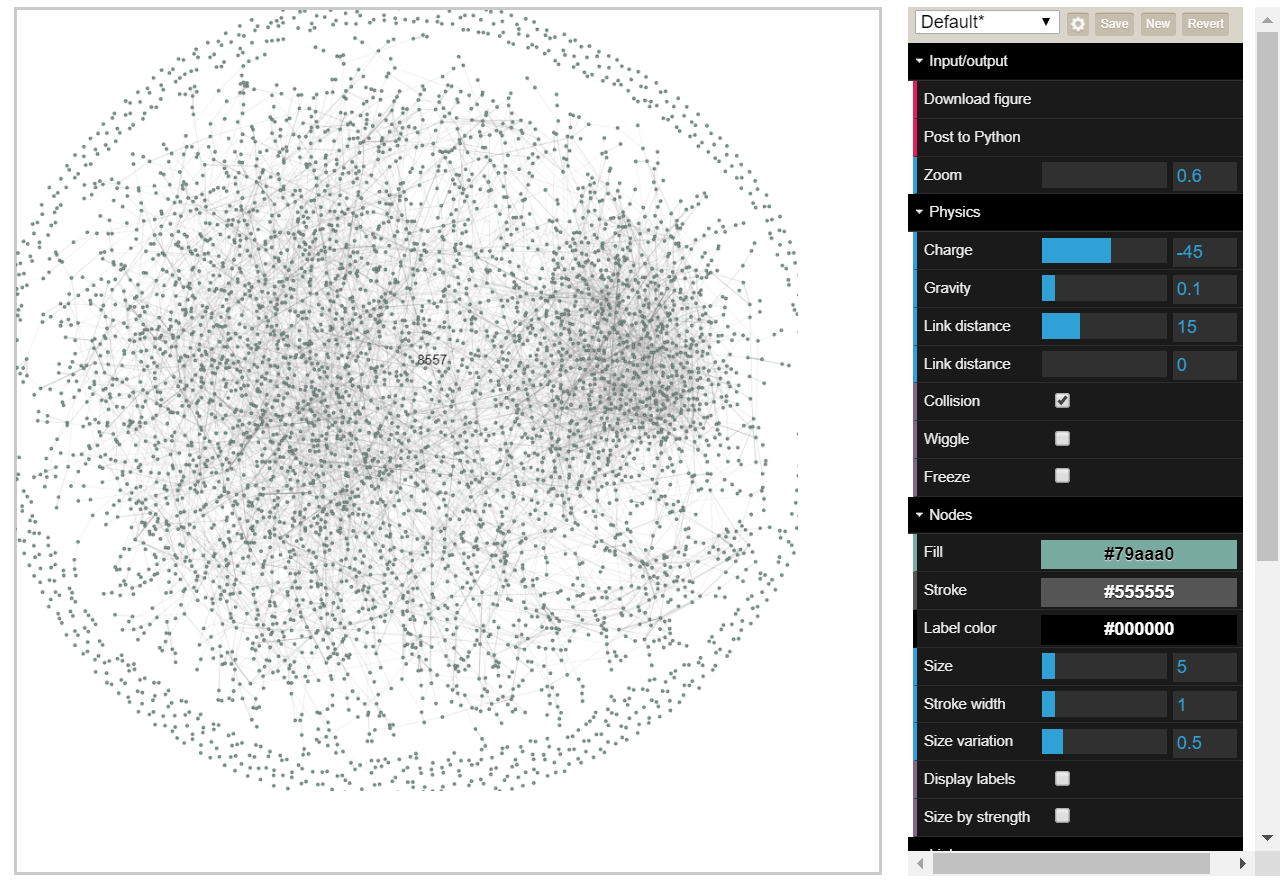

In [35]:
from PIL import Image
Image.open("screenshot.png")